In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t 
import sklearn.linear_model as lm
import csv

In [4]:
filename = "invest.txt"
 
# initializing the titles and rows list
fields = []
rows = []
 
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
        

In [5]:
type(rows[0][0])

str

In [6]:
print(fields)
for i,row in enumerate(rows):
    print(row)
    if i+1 == 5:
        break

['year "gnp" "invest" "cpi" "interest"']
['1968 873.4 133.3 82.54 5.16']
['1969 944 149.3 86.79 5.87']
['1970 992.7 144.2 91.45 5.95']
['1971 1077.6 166.4 96.01 4.88']
['1972 1185.9 195 100 4.5']


In [7]:
GNP = np.zeros((len(rows))).T
Invest = np.zeros((len(rows))).T
Interest = np.zeros((len(rows))).T
print(np.shape(GNP))

for i,row in enumerate(rows):
    splitRow = row[0].split(" ")
    GNP[i] = np.log(float(splitRow[1]))
    Invest[i] = np.log(float(splitRow[2]))
    Interest[i] = float(splitRow[4])
    
print("GNP data :" + str(GNP))   
print("Invest data :" + str(Invest))
print("Interest data :" + str(Interest))

(15,)
GNP data :[6.77239364 6.85012617 6.9004285  6.98249163 7.07825726 7.19022378
 7.26836248 7.34549395 7.4489161  7.55919466 7.67966743 7.79061331
 7.87591714 7.98538224 8.02535287]
Invest data :[4.89260223 5.0059577  4.97120122 5.11439453 5.27299956 5.43720937
 5.4324111  5.32836149 5.55257191 5.78105211 5.95739057 6.04737218
 5.99719808 6.1559191  6.04476832]
Interest data :[ 5.16  5.87  5.95  4.88  4.5   6.44  7.83  6.25  5.5   5.46  7.46 10.28
 11.77 13.42 11.02]


Text(0, 0.5, 'Invest Data')

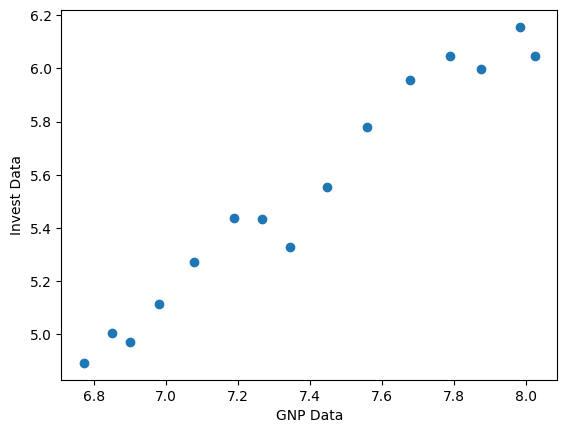

In [8]:
plt.scatter(GNP, Invest)
plt.xlabel("GNP Data")
plt.ylabel("Invest Data")

# Question 3

Nous allons appliquer les formules données dans le sujet.

$\hat{\beta}_{1} = \frac{\sum_{1}^{n}\left(x_i - \overline{x}\right)\left(Y_i - \overline{Y}\right)}{\sum_{1}^{n}\left(x_i - \overline{x}\right)^2}$


In [9]:
n = len(rows)
p = 1
esp_GNP = GNP.sum() / n
esp_Invest = Invest.sum() / n

cov_GNP_Invest = sum((GNP - esp_GNP)*(Invest - esp_Invest)) / n
var_GNP = sum((GNP - esp_GNP)**2) / n

beta_1 = cov_GNP_Invest / var_GNP
beta_0 = esp_Invest - beta_1 * esp_GNP
print("beta_1 vaut : " + str(beta_1))
print("beta_0 vaut : " + str(beta_0))

beta_1 vaut : 1.015281401598871
beta_0 vaut : -1.9635913352301815


Calculons les écarts-type : 

In [10]:
Invest_est = beta_0 + beta_1 * GNP

sigma2 = sum((Invest - Invest_est)**2) / (n- 2)

std_dev_beta1 = (sigma2 / (var_GNP * n))
std_dev_beta0 = (esp_GNP * std_dev_beta1 + sigma2 / n) ** 0.5
std_dev_beta1 = std_dev_beta1 ** 0.5

print("std_dev_beta0 vaut : " + str(std_dev_beta0))
print("std_dev_beta1 vaut : " + str(std_dev_beta1))
print("avec sigma2 qui vaut : " + str(sigma2))

std_dev_beta0 vaut : 0.1521811695630874
std_dev_beta1 vaut : 0.05538306035485281
avec sigma2 qui vaut : 0.0076763385554603995


Et le coefficient de determination

In [11]:
R2 = sum((Invest_est - esp_Invest)**2) / sum((Invest - esp_Invest)**2)

print("R2 vaut : " + str(R2))

R2 vaut : 0.9627572956057855


# Question 4

Nous allons effectuer un test de Student de niveau $\alpha$ sur le terme $\hat{\beta}_1$. Avec pour hypothese $\mathcal{H}_0 : {\hat{\beta}_1 = 0}$. Dans le cas ou l'on rejette $\mathcal{H}_0$ on pourra affirmer la signifiance de $\hat{\beta}_1$.

In [12]:
alpha = 0.05
def Std_test(est):
    t2 = t.ppf(1 - alpha/2, n - (p + 1))
    t1 = - t2
    return est > t2 or est < t1


print("On rejette l'hypothese H_0" if Std_test(beta_1 / std_dev_beta1) else "On accepte l'hypothese H_0")

On rejette l'hypothese H_0


Calculons la p-value, c'est à dire supposons que $\beta_j = 0$, calculons $P\left(\frac{\hat{\beta}_1}{\sqrt{\mathbb{V}\left[\hat{\beta}_1\right]}} \geq valeur\ observee\right) = 1 - P\left(\frac{\hat{\beta}_1}{\sqrt{\mathbb{V}\left[\hat{\beta}_1\right]}} \leq valeur\ observee\right)$. On retrouve la fonction de répartition de $\frac{\hat{\beta}_1}{\sqrt{\mathbb{V}\left[\hat{\beta}_1\right]}}$ qui suit lorsque $\beta_j = 0$ une loi de Student avec $n - (p + 1)$ degrés de liberté.

In [13]:
p_value = 1 - t.cdf(beta_1 / std_dev_beta1, n - (p + 1))
print("La p-value est de : " + str(p_value * 100) + "%")

p_value = 1 - t.cdf(beta_0 / std_dev_beta0, n - (p + 1))
print("La p-value pour beta0 est de : " + str(p_value * 100) + "%")


La p-value est de : 5.681854986505641e-09%
La p-value pour beta0 est de : 99.99999956438575%


Il y a donc une chance extremenent faible voir impossible d'obtenir notre observation sous l'hypothese $\mathcal{H}_0$

# Question 5

Given $\hat{\beta}_0$ and $\hat{\beta}_1$ we are now able to estimate the investment needed for a GNP value of for example $X = 1000$.

In [14]:
def est_Invest(GNP):
    return beta_0 + beta_1 * GNP


print(est_Invest(1000))

1013.3178102636408


In [27]:
alpha = 0.005

def CI(x):
    Y = est_Invest(x)
    t_a = t.ppf(1 - alpha/2, n - (p + 1)) #confidence at level (1 - alpha/2)
    return (Y - t_a * (sigma2*(1/n + (x - esp_GNP)**2 / np.sum((GNP - esp_GNP)**2)))**0.5,Y + t_a * (sigma2*(1/n + (x - esp_GNP)**2 / np.sum((GNP - esp_GNP)**2))**0.5))

def PI(x):
    Y = est_Invest(x)
    t_a = t.ppf(1 - alpha/2, n - (p + 1))
    return (Y - t_a * (sigma2*(1 + 1/n + (x - esp_GNP)**2 / np.sum((GNP - esp_GNP)**2)))**0.5,Y + t_a * (sigma2*(1 + 1/n + (x - esp_GNP)**2 / np.sum((GNP - esp_GNP)**2))**0.5))

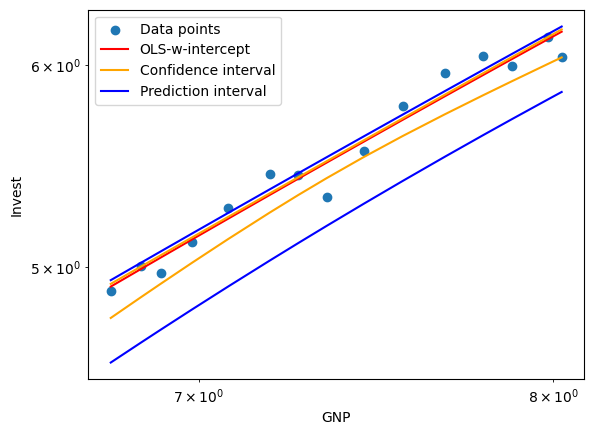

In [28]:
figure, ax = plt.subplots(1,1)
ax.scatter(GNP, Invest)
ax.plot(GNP, Invest_est, "r")
ax.plot(GNP, CI(GNP)[0], "orange")
ax.plot(GNP, PI(GNP)[0], "blue")
ax.plot(GNP, CI(GNP)[1], "orange")
ax.plot(GNP, PI(GNP)[1], "blue")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("GNP")
ax.set_ylabel("Invest")
ax.legend(["Data points", "OLS-w-intercept", "Confidence interval", "Prediction interval"])

(6.907755278982137, 6.920985186796048)


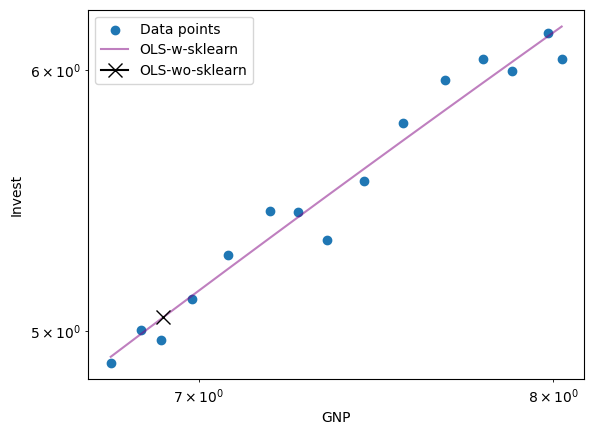

In [45]:
reg = lm.LinearRegression().fit(GNP.reshape(-1, 1), Invest.reshape(-1, 1))
pred = reg.predict(GNP.reshape(-1, 1))
figure, ax = plt.subplots(1,1)
ax.scatter(GNP, Invest)
ax.plot(GNP, pred, "purple", alpha = 0.5)

ax.plot(np.log(1000), est_Invest(np.log(1000)), "black", marker="x", markersize=10)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("GNP")
ax.set_ylabel("Invest")
ax.legend(["Data points", "OLS-w-sklearn", "OLS-wo-sklearn"])

print((np.log(1000), np.log(est_Invest(1000))))

On voit que les deux OLS coincident parfaitement, en effet :

In [50]:
lmR2 = reg.score(GNP.reshape(-1, 1), Invest.reshape(-1, 1))
print(lmR2 == R2)

True


# Question 9 

In [194]:
col = np.ones(len(GNP)).reshape(-1,1)
X = np.append(col,np.append(GNP.reshape(-1, 1), Interest.reshape(-1, 1), axis = 1), axis=1)

p = 2
n = len(GNP)

Gram = np.matmul(X.T, X)/n


def isFullRank(matrix):
    w,v = np.linalg.eig(matrix)
    print("The matrix is " + ("not " if 0 in w else "") + "full rank.")

isFullRank(Gram)

Theta_est = np.matmul(np.linalg.inv(Gram*n), np.matmul(X.T, Invest))
Invest_est = np.matmul(X,Theta_est)

beta_0 = Theta_est[0]
beta_1 = Theta_est[1]
beta_2 = Theta_est[2]

print("beta0 has value : " + str(beta_0))
print("beta1 has value : " + str(beta_1))
print("beta2 has value : " + str(beta_2))

sigma2 = np.sum((Invest - Invest_est)**2)/(n - (p+1))

C = sigma2*np.linalg.inv(Gram*n)
std_dev_beta0 = C[0][0]**0.5 
std_dev_beta1 = C[1][1]**0.5 
std_dev_beta2 = C[2][2]**0.5 


print("Sigma2 has value : " + str(sigma2))
print("std_dev_beta0 has value : " + str(std_dev_beta0))
print("std_dev_beta1 has value : " + str(std_dev_beta1))
print("std_dev_beta2 has value : " + str(std_dev_beta2))

The matrix is full rank.
beta0 has value : -2.1804547259138434
beta1 has value : 1.05124269131998
beta2 has value : -0.006528879406110533
Sigma2 has value : 0.00819243295551982
std_dev_beta0 has value : 0.6623991977963711
std_dev_beta1 has value : 0.10206137806192347
std_dev_beta2 has value : 0.015344205065604261


In [195]:
def est_Invest(x):
    return np.matmul(x,Theta_est)

def CI(x):
    t_a = t.ppf(1 - alpha/2, n - (p + 1)) #confidence at level (1 - alpha/2)
    intervals = []
    for obs in x:
        Y = est_Invest(obs)
        intervals.append((Y - t_a*(sigma2* np.matmul(obs.T,np.matmul(np.linalg.inv(Gram*n), obs)))**0.5, Y + t_a*(sigma2* np.matmul(obs.T,np.matmul(np.linalg.inv(Gram*n), obs)))**0.5))
    return intervals
            
def PI(x):
    t_a = t.ppf(1 - alpha/2, n - (p + 1)) #confidence at level (1 - alpha/2)
    intervals = []
    for obs in x:
        Y = est_Invest(obs)
        intervals.append((Y - t_a*(sigma2*(1+ np.matmul(obs.T,np.matmul(np.linalg.inv(Gram*n), obs))))**0.5, Y + t_a*(sigma2* (1+np.matmul(obs.T,np.matmul(np.linalg.inv(Gram*n), obs))))**0.5))
    return intervals

# Question 10

In [196]:
print("On rejette l'hypothese H_0 pour beta_0" if Std_test(beta_0 / std_dev_beta0) else "On accepte l'hypothese H_0 pour beta_0")
print("On rejette l'hypothese H_0 pour beta_1" if Std_test(beta_1 / std_dev_beta1) else "On accepte l'hypothese H_0 pour beta_1")
print("On rejette l'hypothese H_0 pour beta_2" if Std_test(beta_2 / std_dev_beta2) else "On accepte l'hypothese H_0 pour beta_2")

On rejette l'hypothese H_0 pour beta_0
On rejette l'hypothese H_0 pour beta_1
On accepte l'hypothese H_0 pour beta_2


In [197]:
p_value = 1 - t.cdf(beta_0 / std_dev_beta0, n - (p + 1))
print("La p-value pour beta0 est de : " + str(p_value * 100) + "%")

p_value = 1 - t.cdf(beta_1 / std_dev_beta1, n - (p + 1))
print("La p-value pour beta1 est de : " + str(p_value * 100) + "%")

p_value = 1 - t.cdf(beta_2 / std_dev_beta2, n - (p + 1))
print("La p-value pour beta2 est de : " + str(p_value * 100) + "%")

La p-value pour beta0 est de : 99.67808164745544%
La p-value pour beta1 est de : 1.2997584242224747e-05%
La p-value pour beta2 est de : 66.09964290590415%


In [198]:
R2 = sum((Invest_est - esp_Invest)**2) / sum((Invest - esp_Invest)**2)

print("R2 vaut : " + str(R2))

R2 vaut : 0.9633108306727979


# Question 11

In [218]:
x0 = np.log(np.array([[1,1000,10]]))
print(est_Invest(x0))
alpha = 0.002
print(CI(x0))
print(PI(x0))

[7.24669395]
[(4.590074980510854, 9.903312919614175)]
[(4.566370827149479, 9.92701707297555)]


<Figure size 640x480 with 0 Axes>

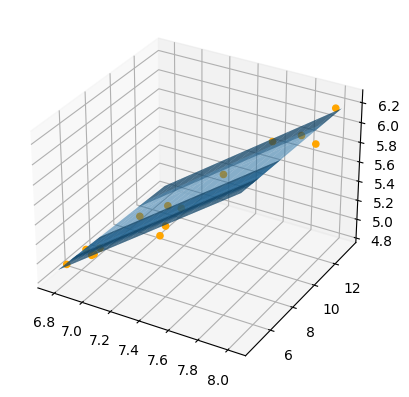

In [292]:
def test_Invest(x):
    est = []
    for obs in x:
        est.append(beta_0 + beta_1*x[0] + beta_2*x[0])
    return est

from matplotlib import cm

xx, yy = np.meshgrid(GNP, Interest)
zz = beta_0 + beta_1*xx + beta_2*yy
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')

ax.plot_surface(xx, yy, zz, alpha = 0.5)
ax.scatter(GNP, Interest, Invest, color="orange", alpha = 1)
plt.show()
